# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
# I need to convert this chategorical(sex, region, smoker) data to the numerical data

In [4]:
# Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# shape of the dataset
data.shape

(1338, 7)

In [6]:
# checking the columns
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
# checking is any unique value
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
# Checking unique value for particular field by printing the unique value
print(data['sex'].unique())
data['children'].unique()

['female' 'male']


array([0, 1, 3, 2, 5, 4])

In [9]:
# checking the missing values (we can use data.isna() or data.isnull() )
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [10]:
data.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
# describing the statistical of the data
data.describe()
# in the below table 50% is the median, 25% is the Q1 and 75% is the Q3 of the box plot

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# count values in the data set
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
# data correlation
data.corr()

/tmp/ipykernel_3643/1219912108.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


/tmp/ipykernel_3643/4035710024.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

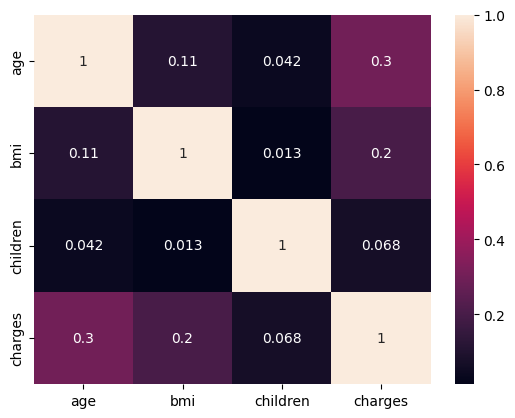

In [15]:
# Data Visualization heatmap
sns.heatmap(data.corr(),annot=True)

<AxesSubplot: xlabel='age', ylabel='charges'>

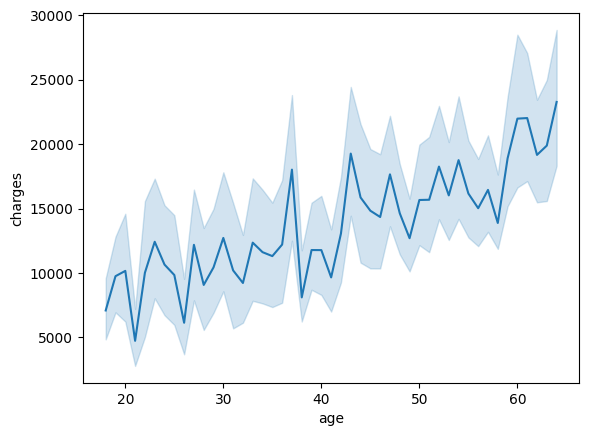

In [16]:
sns.lineplot(x=data['age'], y=data['charges'])

## Handling Outlier

Text(0.5, 0, 'bmi')

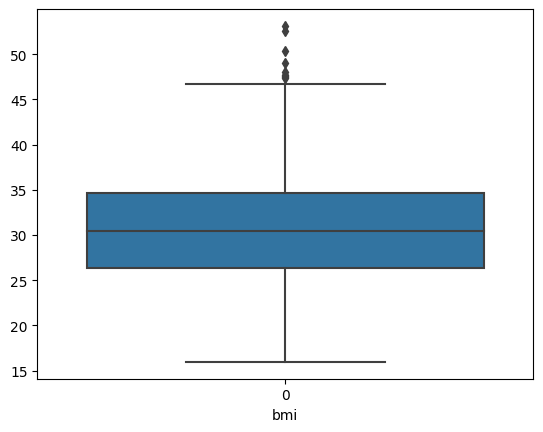

In [17]:
# we can check the outlier using boxplot
sns.boxplot(data['bmi'])
plt.xlabel("bmi")
#This dots on the top is the box plots is the outliers

In [18]:
# quantile
qnt=data.quantile(q=(0.75,0.25))
qnt

/tmp/ipykernel_3643/190782308.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  qnt=data.quantile(q=(0.75,0.25))


,age,bmi,children,charges
0.75,51.0,34.69375,2.0,16639.912515
0.25,27.0,26.29625,0.0,4740.287150


In [19]:
# calculating the upper and the lower limit using the below formula
# upper extreme = Q3 +1.5*IQR
# lower extreme = Q1-1.5*IQR
# IQR=Q3-Q1
IQR = qnt.loc[0.75]-qnt.loc[0.25]
IQR

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64

In [20]:
# Upper extreme
ue=qnt.loc[0.75]+1.5*IQR
ue

age            87.000000
bmi            47.290000
children        5.000000
charges     34489.350562
dtype: float64

In [21]:
# Lower extreme
le=qnt.loc[0.25]-1.5*IQR
le

age            -9.000000
bmi            13.700000
children       -3.000000
charges    -13109.150897
dtype: float64

In [22]:
data.mean()

/tmp/ipykernel_3643/531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

## Replacing the outlier

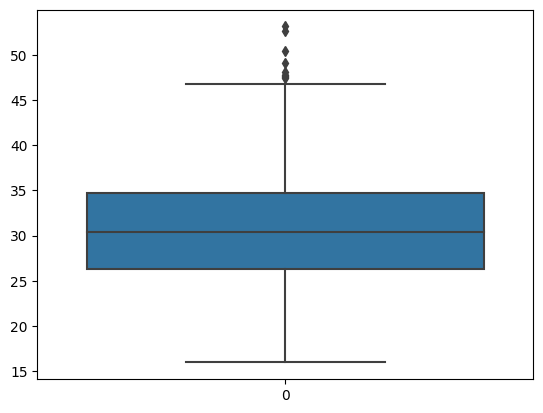

<AxesSubplot: >

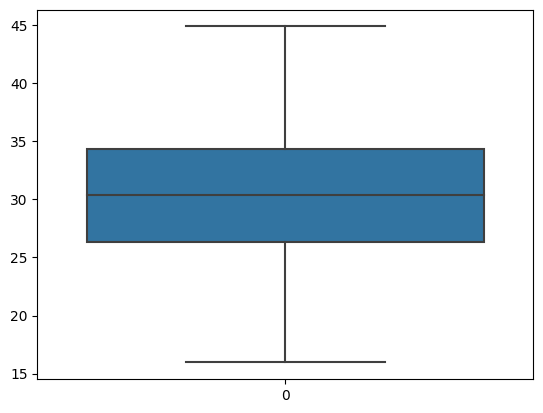

In [23]:
sns.boxplot(data['bmi'])
plt.show()
data['bmi']=np.where(data["bmi"]>45,31,data['bmi'])
sns.boxplot(data.bmi)

# Now you can see the outlier is removed

## Encoding
###### We need to convert the categorical data (sex,region,smoker) into the numerical values using one hot encoding

In [24]:
# Manually handeling the categorical data
data['sex'].replace({'female':0,'male':1},inplace=True)
data['smoker'].replace({'yes':1, 'no':0},inplace=True)
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
5,31,0,25.740,0,0,southeast,3756.62160
6,46,0,33.440,1,0,southeast,8240.58960
7,37,0,27.740,3,0,northwest,7281.50560
8,37,1,29.830,2,0,northeast,6406.41070
9,60,0,25.840,0,0,northwest,28923.13692


In [25]:
# converting data using dummies function
data_main=pd.get_dummies(data,columns=['region'])
data_main.head(10)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
5,31,0,25.740,0,0,3756.62160,0,0,1,0
6,46,0,33.440,1,0,8240.58960,0,0,1,0
7,37,0,27.740,3,0,7281.50560,0,1,0,0
8,37,1,29.830,2,0,6406.41070,1,0,0,0
9,60,0,25.840,0,0,28923.13692,0,1,0,0



## Seperating the data

In [26]:
#target variable
y=data_main['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [27]:
# independent
x=data_main.drop(columns=['charges'],axis=1)
x.head()
# charges column is successfully removed

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


## Scaling

In [28]:
from sklearn.preprocessing import scale

In [29]:
x=scale(x)
x

array([[-1.43876426, -1.0105187 , -0.43951908, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.98959079,  0.58590685, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.98959079,  0.45139612, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545, -1.0105187 ,  1.12394975, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -1.0105187 , -0.80636652, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -1.0105187 , -0.23513265, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [30]:
# you can see that mean is nearly zero and standard deviation is 1 
print(x.mean(),x.std())

-7.24290988328785e-17 1.0


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# test_size=0.2 represent, assigning the 20% of the data for the test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)
x_train.shape

(1070, 9)

In [33]:
x_test.shape

(268, 9)

In [34]:
y_train.shape

(1070,)

In [35]:
y_test.shape

(268,)

## Handling Missing Value

In [36]:
# creating own dataset
df=pd.DataFrame({'a':[1,2,np.nan], 'b':[1,np.nan, np.nan], 'c':[1,2,3]})
df.head()

,a,b,c
0,1.0,1.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [37]:
df.isnull()

,a,b,c
0,False,False,False
1,False,True,False
2,True,True,False


In [38]:
df.isnull().any()

a     True
b     True
c    False
dtype: bool

In [39]:
df.isnull().sum()

a    1
b    2
c    0
dtype: int64

In [40]:
df.isna().sum().sum()

3

##### Two ways to handling the missing data
1) Removing the entire row that has null value
2) Replace nan value with the mean

In [41]:
# 1) handling missing value using dropna(). it deletes the entier row
non_missing_value=df.dropna()
non_missing_value

,a,b,c
0,1.0,1.0,1


In [42]:
df

,a,b,c
0,1.0,1.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [43]:
# 2) Replacing the value

In [44]:
df.mean()

a    1.5
b    1.0
c    2.0
dtype: float64

In [45]:
# lets replace the null value with the mean value
df['a'].fillna(df['a'].mean(),inplace=True)
df

,a,b,c
0,1.0,1.0,1
1,2.0,NaN,2
2,1.5,NaN,3


In [46]:
# lets replace the null value with the median value
df['b'].fillna(df['b'].median(),inplace=True)
df

,a,b,c
0,1.0,1.0,1
1,2.0,1.0,2
2,1.5,1.0,3


In [74]:
# lets replace the null value (of the categorical field) with the mode value
d1={'name':['rahul','tirumal','sanjay'],
    'age':[20,21,22],
    'degree':['BE','BE','BCA'],
    'percentage':[60,70,80]}
df1=pd.DataFrame(data=d1,index=['row1','row2','row3'])
df1

,name,age,degree,percentage
row1,rahul,20,BE,60
row2,tirumal,21,BE,70
row3,sanjay,22,BCA,80


In [75]:
# using replace function we replace the value with nan
df1=df1.replace('BCA',np.nan)
df1

,name,age,degree,percentage
row1,rahul,20,BE,60
row2,tirumal,21,BE,70
row3,sanjay,22,NaN,80


In [80]:
df1['degree']=df1['degree'].fillna(df1['degree'].mode()[0])
df1

,name,age,degree,percentage
row1,rahul,20,BE,60
row2,tirumal,21,BE,70
row3,sanjay,22,BE,80
